<a href="https://colab.research.google.com/github/gabrielalastra/Eurostats/blob/main/landcover_EU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>Data Cleaning</h3>
<hr color=purple>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path= '/content/drive/MyDrive/Colab Notebooks/dataset/lan_lcv_ovw_1_Data.csv'

In [ ]:
import chardet
with open(path, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result


{'confidence': 0.7277442613301942, 'encoding': 'ISO-8859-1', 'language': ''}

In [ ]:
db= pd.read_csv(path, encoding='ISO-8859-1', error_bad_lines=False, sep=',')
db.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,TIME,GEO,UNIT,LANDCOVER,Value,Flag and Footnotes
0,2018,Belgium,Percentage,Total land cover,100.0,NaN
1,2018,Belgium,Percentage,Artificial land,11.7,NaN
2,2018,Belgium,Percentage,Cropland,29.1,NaN
3,2018,Belgium,Percentage,Woodland,26.5,NaN
4,2018,Belgium,Percentage,Shrubland,1.3,NaN


In [7]:
db['LANDCOVER'].value_counts()

Total land cover    1764
Artificial land     1764
Cropland            1764
Woodland            1764
Shrubland           1764
Grassland           1764
Bare land           1764
Water               1764
Wetland             1764
Name: LANDCOVER, dtype: int64

In [8]:
db['GEO'].value_counts()

Malta                    108
Luxembourg               108
Northern Ireland (UK)     72
Corse                     72
Berlin                    72
                        ... 
Haute-Normandie           36
Basse-Normandie           36
Normandie                 36
Franche-Comté             36
Emilia-Romagna            36
Name: GEO, Length: 412, dtype: int64

In [9]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15876 entries, 0 to 15875
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   TIME                15876 non-null  int64 
 1   GEO                 15876 non-null  object
 2   UNIT                15876 non-null  object
 3   LANDCOVER           15876 non-null  object
 4   Value               15876 non-null  object
 5   Flag and Footnotes  1414 non-null   object
dtypes: int64(1), object(5)
memory usage: 744.3+ KB


In [13]:
#search for nan values
print(db.isnull().value_counts())
print('/n', db.isna().value_counts())

TIME   GEO    UNIT   LANDCOVER  Value  Flag and Footnotes
False  False  False  False      False  True                  14462
                                       False                  1414
dtype: int64
/n TIME   GEO    UNIT   LANDCOVER  Value  Flag and Footnotes
False  False  False  False      False  True                  14462
                                       False                  1414
dtype: int64


In [14]:
db = db.drop(columns=['UNIT'])

<h3>Quick View</h3>
<hr color=purple>

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:
mask = (db['LANDCOVER'] == 'Water')

In [17]:
mask = db[mask]

In [18]:
mask.head()

,TIME,GEO,LANDCOVER,Value,Flag and Footnotes
7,2018,Belgium,Water,1.1,NaN
16,2018,Région de Bruxelles-Capitale/Brussels Hoofdste...,Water,4,u
25,2018,Région de Bruxelles-Capitale/Brussels Hoofdste...,Water,4,u
34,2018,Vlaams Gewest,Water,2.1,NaN
43,2018,Prov. Antwerpen,Water,3.7,NaN


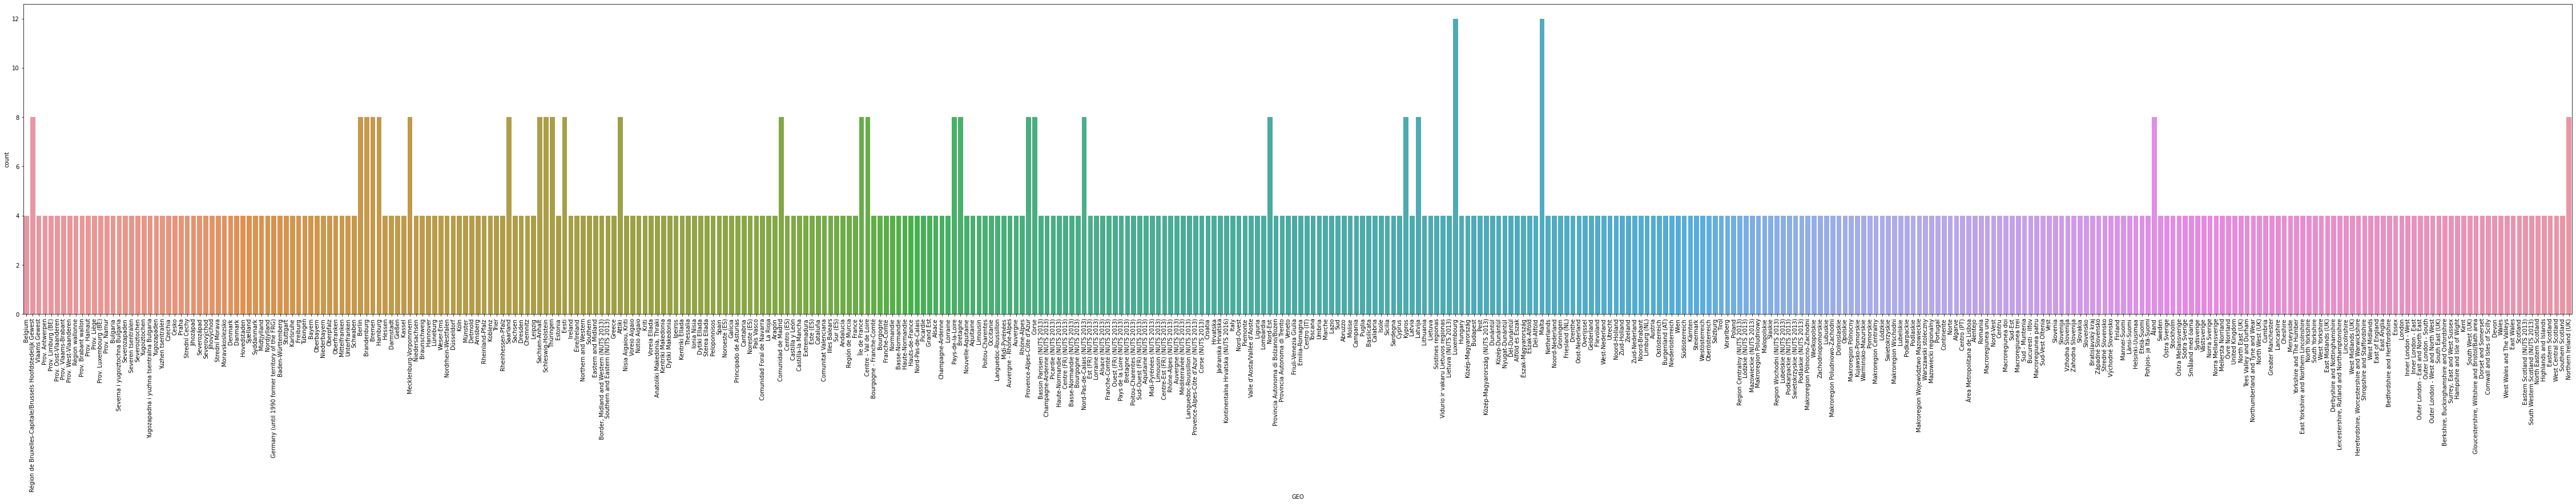

In [47]:
features=['GEO']
for i in features:
  plt.figure(figsize=[80,10])
  g = sns.countplot(x=i, data=mask)
  g.set_xticklabels(g.get_xticklabels(), rotation=90)